In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [56]:
dataset = pd.read_csv("./kalimati_tarkari_dataset_cleaned.csv")

In [57]:
dataset.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


In [58]:
dataset['Date'] =pd.to_datetime(dataset['Date'])

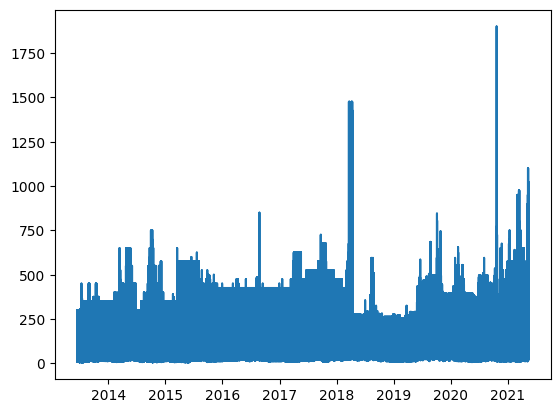

In [59]:
plt.plot(dataset["Date"], dataset['Average'])

In [60]:
max_row = dataset.loc[dataset['Average'].idxmax()]
max_row


SN                        177595
Commodity              Asparagus
Date         2020-10-22 00:00:00
Unit                          Kg
Minimum                   1800.0
Maximum                   2000.0
Average                   1900.0
Name: 177595, dtype: object

count    7583.000000
mean       89.939712
std        80.781075
min         5.500000
25%        41.854839
50%        63.833333
75%       105.000000
max      1900.000000
Name: Average, dtype: float64


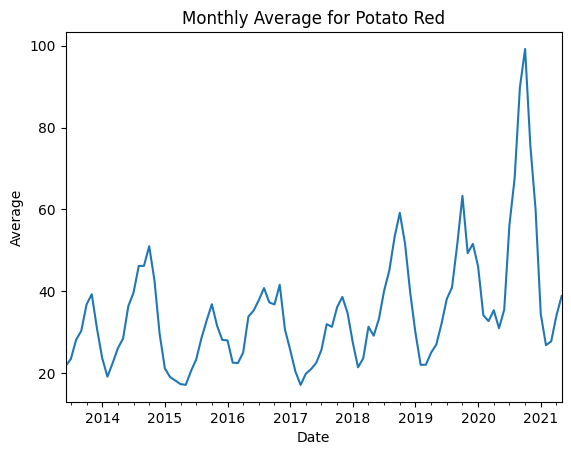

Commodity    Date      
Apple(Fuji)  2019-05-31    255.000000
             2019-06-30    298.000000
             2019-07-31    310.322581
             2019-08-31    313.600000
             2019-09-30           NaN
Name: Average, dtype: float64

In [64]:
# Group by Commodity and resample by month to calculate the monthly average
monthly_avg = dataset.groupby('Commodity').resample('ME', on="Date")['Average'].mean()

monthly_avg.loc['Potato Red'].plot()

print(monthly_avg.describe())

plt.xlabel('Date')
plt.ylabel('Average')
plt.title('Monthly Average for Potato Red')
plt.show()

monthly_avg.head()

In [48]:
# Convert the Series to a DataFrame to handle missing values and scaling
df = monthly_avg.reset_index()
df.columns = ['Commodity', 'Date', 'Average']

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Handle NaN values (e.g., by filling with the mean of the group or by dropping them)
df['Average'] = df.groupby('Commodity')['Average'].transform(lambda x: x.fillna(x.mean()))

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply the MinMaxScaler by grouping by 'Commodity'
df['Normalized Average'] = df.groupby('Commodity')['Average'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Convert the DataFrame back to a Series with a MultiIndex
normalized_series = df.set_index(['Commodity', 'Date'])['Normalized Average']

# Display the result
print(normalized_series)

Commodity    Date      
Apple(Fuji)  2019-05-31    0.640589
             2019-06-30    0.904321
             2019-07-31    0.979899
             2019-08-31    1.000000
             2019-09-30    0.780182
                             ...   
Yam          2020-12-31    0.657734
             2021-01-31    0.636799
             2021-02-28    0.682792
             2021-03-31    1.000000
             2021-04-30    0.978581
Name: Normalized Average, Length: 9646, dtype: float64


count    9646.000000
mean        0.343175
std         0.226507
min         0.000000
25%         0.170455
50%         0.312553
75%         0.455155
max         1.000000
Name: Normalized Average, dtype: float64
Commodity    Date      
Apple(Fuji)  2019-05-31    0.640589
             2019-06-30    0.904321
             2019-07-31    0.979899
             2019-08-31    1.000000
             2019-09-30    0.780182
Name: Normalized Average, dtype: float64


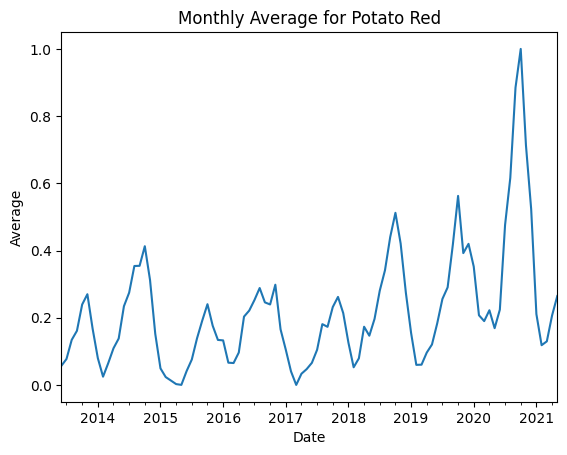

In [49]:
normalized_series.loc['Potato Red'].plot()

print(normalized_series.describe())
print(normalized_series.head())

plt.xlabel('Date')
plt.ylabel('Average')
plt.title('Monthly Average for Potato Red')
plt.show()

                        Normalized Average  Cluster
Commodity   Date                                   
Apple(Fuji) 2019-05-31            0.640589        1
            2019-06-30            0.904321        1
            2019-07-31            0.979899        1
            2019-08-31            1.000000        1
            2019-09-30            0.780182        1
...                                    ...      ...
Yam         2020-12-31            0.657734        1
            2021-01-31            0.636799        1
            2021-02-28            0.682792        1
            2021-03-31            1.000000        1
            2021-04-30            0.978581        1

[9646 rows x 2 columns]


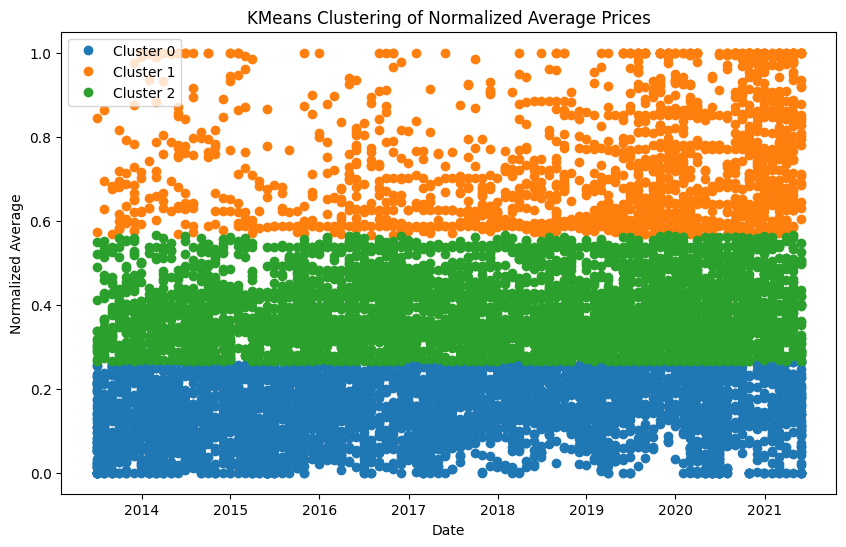

In [50]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming normalized_series is your Series with a MultiIndex
# Reset index to get a DataFrame for clustering
df = normalized_series.reset_index()

# Prepare the data for KMeans clustering
X = df[['Normalized Average']]

# Define the number of clusters (k)
k = 3  # You can adjust the number of clusters

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Set the index back to the original MultiIndex
df.set_index(['Commodity', 'Date'], inplace=True)

# Display the DataFrame with cluster labels
print(df)

# Optionally, visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]['Normalized Average']
    plt.plot(cluster_data.index.get_level_values('Date'), cluster_data, marker='o', linestyle='', label=f'Cluster {cluster}')

plt.title('KMeans Clustering of Normalized Average Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Average')
plt.legend()
plt.show()


In [51]:
from scipy import stats

# Calculate z-scores for each column
z_scores = stats.zscore(dataset[['Minimum', 'Maximum', 'Average']])

# Define threshold for outliers
threshold = 3

# Filter out rows with z-scores greater than the threshold
dataset = dataset[(z_scores < threshold).all(axis=1)]

In [52]:
unique_commodities = dataset.groupby('Commodity')

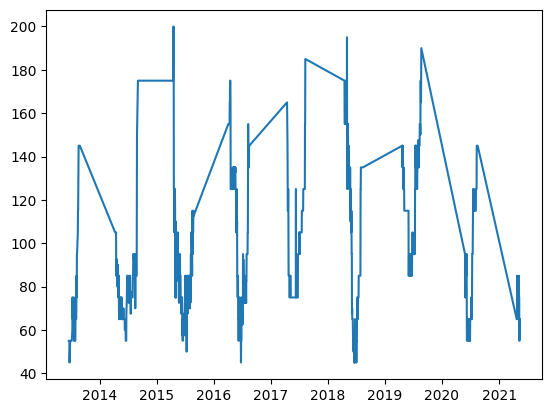

In [53]:
plt.plot(unique_commodities.get_group('Mango(Maldah)')[['Date']], unique_commodities.get_group('Mango(Maldah)')['Average'])

In [54]:
uni

NameError: name 'uni' is not defined